In [1]:
import numpy as np

X0 = np.array([[400, -201],
            [-800, 401]])
Y = np.array([200,-200])

In [2]:
X0

array([[ 400, -201],
       [-800,  401]])

In [3]:
Y.reshape(-1,1)

array([[ 200],
       [-200]])

In [4]:
u, s, vh = np.linalg.svd(X0)
s

array([1.00060074e+03, 3.99759848e-01])

In [5]:
np.linalg.cond(X0)

2503.0046004809424

In [6]:
np.linalg.solve(X0,Y)

array([-100., -200.])

In [7]:
X1 = np.array([[401, -201],
              [-800, 401]])

In [8]:
u, s, vh = np.linalg.svd(X1)
s

array([1.00100100e+03, 9.99000002e-04])

In [9]:
np.linalg.cond(X1)

1002003.0000613326

In [10]:
np.linalg.solve(X1,Y)

array([40000.00000004, 79800.00000007])

----

## 2. Cost functions:

Relative error cost function:
$$ L_{n}(f(x_{n},w), y_{n}) := \frac{(f(x_{n},w)-y_{n})^{2}}{y_{n}^{2} + \epsilon} $$ 

In [52]:
from gradient_descent import *
from helpers import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme()

In [16]:
height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
max_iters=50

In [17]:
def least_squares(y, tx):
    """calculate the least squares solution.
    returns mse, and optimal weights"""
    XX = tx.T.dot(tx)
    B = tx.T.dot(y)
    wstar = np.linalg.solve(XX, B) #Solves Xt*X*W=Xt*Y   
    mse = compute_mse(y, tx, wstar)
    return wstar, mse

wstar_ls, err_ls = least_squares(y, tx)

In [18]:
wstar_ls

array([73.293922  , 13.47971243])

In [22]:
f = tx @ wstar_ls

In [86]:
eps = 1
rel_err = ( (f - y)**2 ) / (y**2 + eps)
mse = (f - y)**2

rel_errs = pd.DataFrame({"error":rel_err})
mse_errs = pd.DataFrame({"error":mse})

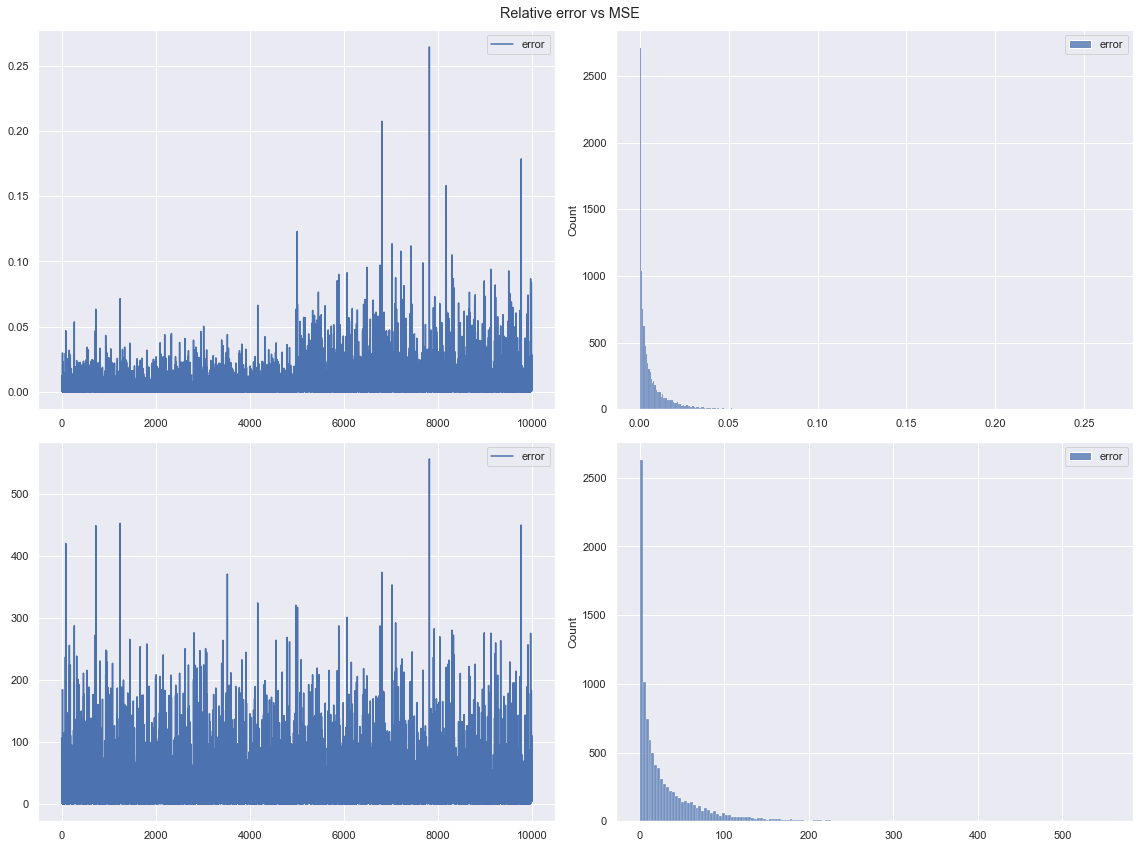

In [87]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

ax = ax.ravel()

fig.suptitle("Relative error vs MSE")



ax[0] = rel_errs.plot(ax=ax[0])
ax[1] = sns.histplot(data=rel_errs, ax=ax[1])


ax[2] = mse_errs.plot(ax=ax[2])
ax[3] = sns.histplot(data=mse_errs, ax=ax[3])

plt.tight_layout()
plt.show()